In [1]:
import numpy as np
import pandas as pd

np.random.seed(0) 
import random

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Basic Details check

In [4]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
import  matplotlib

In [10]:
def image(i):
    plt.imshow(X_train[i],cmap=matplotlib.cm.binary)
    plt.title(y_train[i])
    plt.show()

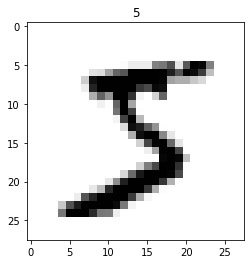

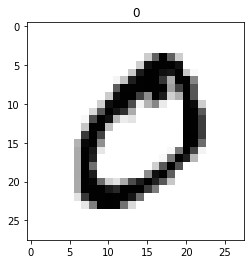

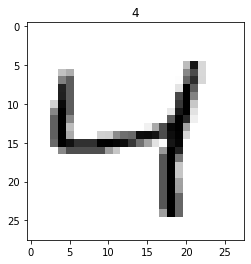

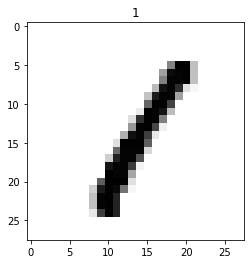

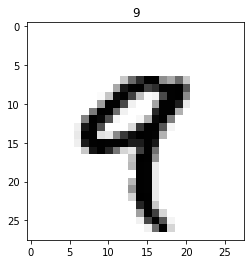

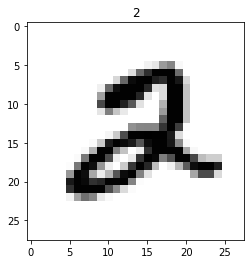

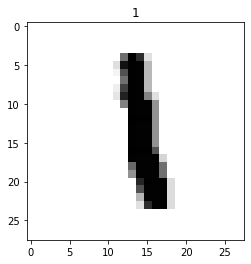

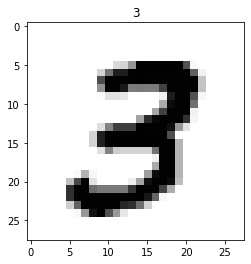

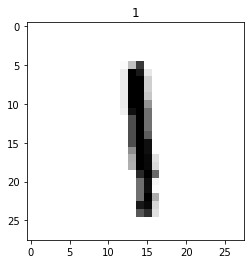

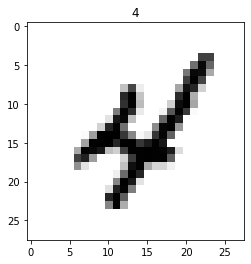

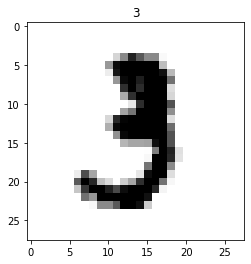

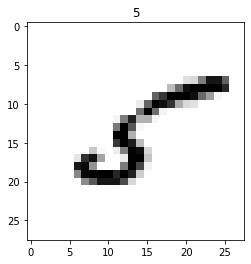

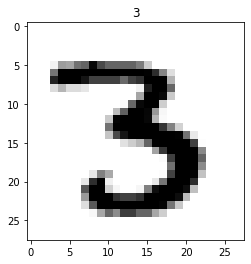

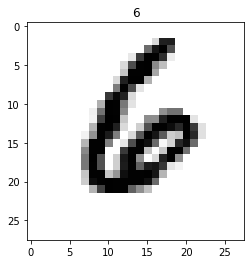

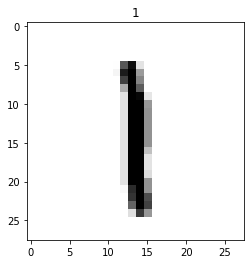

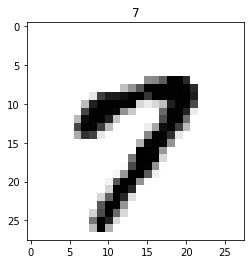

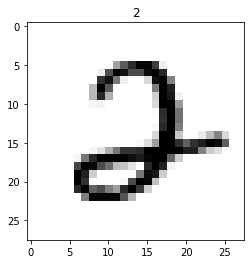

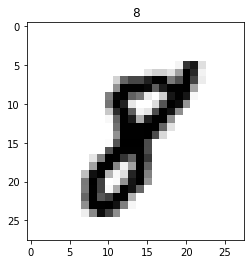

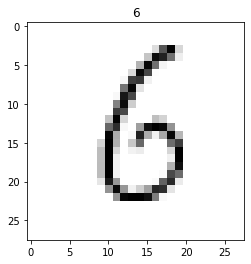

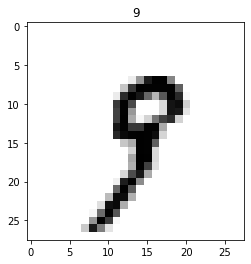

In [11]:
for i in range(20):
      image(i)   

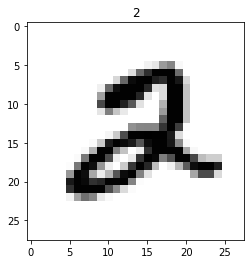

In [12]:
image(5)

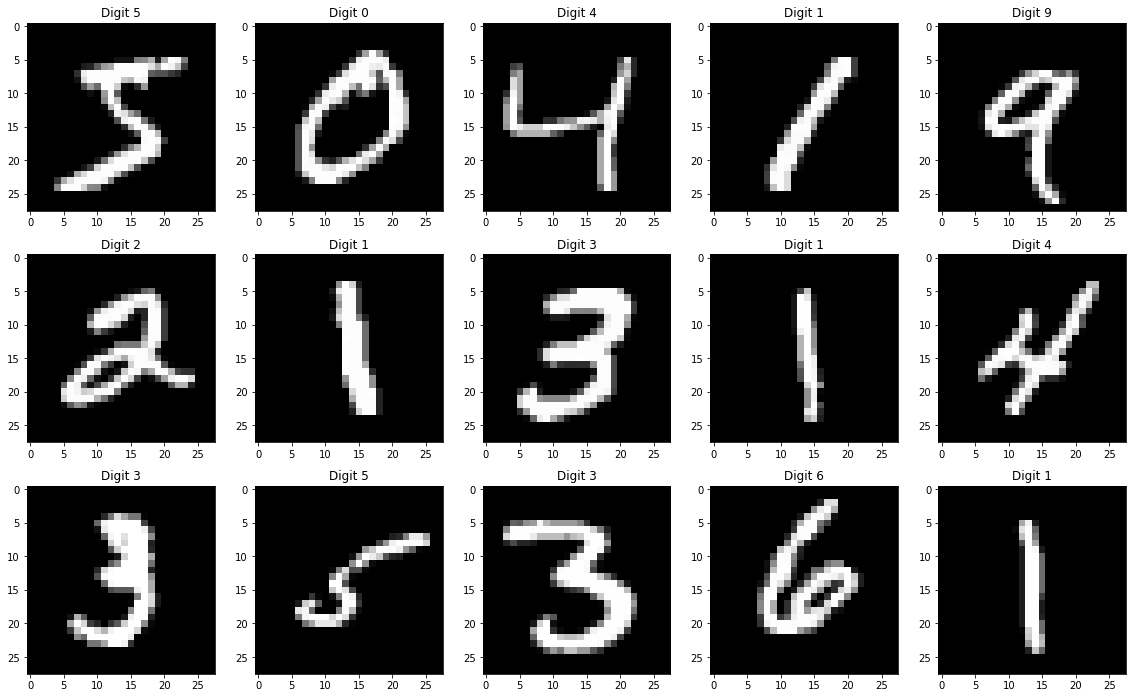

In [16]:
def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for i in range(15):
        plt.subplot(5, 5,i+1)
        plt.imshow(X_train[i], cmap = mono)
        plt.title("Digit {}".format(y_train[i]))
        
    plt.tight_layout()
    
Show_example_digits()

2


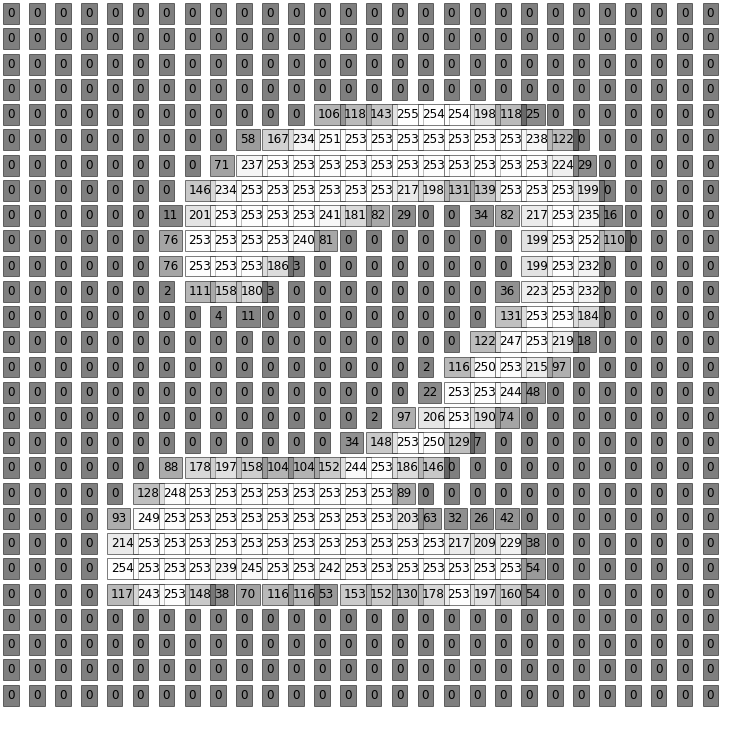

In [17]:
def plot_digit(digit, dem = 28, font_size = 12):
    max_ax = font_size * dem
    
    fig = plt.figure(figsize=(13, 13))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000'
    
    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha = 0.5, edgecolor = 'black'))
            
    plt.show()
rand_number = random.randint(0, len(y_train))
print(y_train[rand_number])
plot_digit(X_train[rand_number])

#### Checking the values of each pixel

In [13]:
## before Normalization

print(X_train[5]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

As images are in Gray Scale Level, therefore 1 channel = 0 to 255

## Preprocessing Images

#### Normalizing the Data

- We perform a grayscale normalization to reduce the effect of illumination's differences.

- Moreover the CNN converg faster on [0..1] data than on [0..255].

In [14]:
## As its gray image and all values vary from 0 to 255 we need to normalize it

import tensorflow as tf

In [20]:
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

In [21]:
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28)


In [22]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


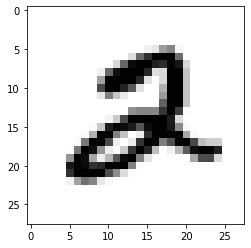

In [23]:
plt.imshow(X_train[5],cmap=plt.cm.binary)

In [24]:
print( X_train[5])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
print(y_train[5])

2


#### Resizing the image apply in Convolution Operation

- Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

- Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [26]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [27]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### converting into One Hot Vector Encoding
- Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors

In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
## In the output we need to make it 0 and 1 as it ranges from 0-9 therefore converting into One Hot Vector Encoding

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [30]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Model Building

##### Creating Deep Learning Architecture - 

-  We used the Keras Sequential API.

In [33]:
##  Traing on 60,000 samples of MNIST handwriiten digits datasets

## Import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

### Model 1 (3 Hidden Layers and with 2 Dropouts

- The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. First Conv2D has 32 filters of kernel size (3X3), the second conv2D layers has 64 filters of kernel size (3X3). Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.
- 'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.
- The CNN can isolate features that are useful everywhere from these transformed images (feature maps).
- The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.
- Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.
- Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. Here we used dropout after combining Conv2D layer with and MaxPooling with 25% and after 1 Fully Connected Layer with 50%.
- The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.
- In the end the features was connected in two fully-connected (Dense) layers which is just artificial neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.
- Compiling with categorical crossentropy(Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to quantify the difference between two probability distributions) as loss and Adam (Adam optimizer involves a combination of two gradient descent methodologies: Momentum: This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace) as optimizer and checking the accuracy Metrics.
- Callbacks- A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). You can use callbacks to: Write TensorBoard logs after every batch of training to monitor your metrics. Periodically save your model to disk. Here we are checking for EarlyStopping and Model Checkpoint.
- Then Train The Model with batch size =100, and epochs= 15
- plotting a Graph of Train and Test Accuracy of Model w.r.t epochs
- Saving the model in h5(data file saved in the Hierarchical Data Format (HDF)) format for future loading
- Evaluating the Model by checking the Test Loss and Test Accuracy and predicting using np.argmax(is a built-in Numpy function that is used to get the indices of the maximum element from an array (single-dimensional array) or any row or column (multidimensional array) of any given array).

In [31]:
model1=Sequential()

#### Convolution Layer ( Hidden layers + fully Connected Layers)

In [34]:
 ## activation vector- to make it non linear, <0-remove, >0-allow for second layer.

## (26*26)
model1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape)) # 32 filters with kernel size 3*3
model1.add(Conv2D(64,(3,3),activation='relu')) # (26-3+1)=24 (24*24)

model1.add(MaxPooling2D(pool_size=(2, 2))) # (24/2)=12 (12*12)

model1.add(Dropout(0.25)) # (12*12)

model1.add(Flatten())

model1.add(Dense(128,activation="relu"))

model1.add(Dropout(0.5))

model1.add(Dense(10,activation="softmax"))

In [35]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                        

#### Compling

In [36]:
model1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#### Callbacks - EarlyStopping, ModelCheckpoint

In [1]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [42]:
## EarlyStopping

early_stopping_cnn1=EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=4, verbose=1)

## Modelcheckpoints

model_checkpoint_cnn1=ModelCheckpoint("./model1.h5",monitor='val_accuracy',verbose=1,save_best_only=True )

cb_cnn1=[early_stopping_cnn1,model_checkpoint_cnn1]

#### Train the Model 1

In [39]:
batch_size = 100
epochs = 15

train = model1.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                  validation_data=(X_test, y_test),validation_split=0.3,callbacks=cb_cnn1)

print("The model has successfully trained")

Epoch 1/15
420/420 [==============================] - ETA: 0s - loss: 0.2464 - accuracy: 0.9249
Epoch 1: val_accuracy improved from -inf to 0.97911, saving model to .\model1.h5
420/420 [==============================] - 114s 269ms/step - loss: 0.2464 - accuracy: 0.9249 - val_loss: 0.0667 - val_accuracy: 0.9791
Epoch 2/15
420/420 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9764
Epoch 2: val_accuracy improved from 0.97911 to 0.98511, saving model to .\model1.h5
420/420 [==============================] - 115s 273ms/step - loss: 0.0849 - accuracy: 0.9764 - val_loss: 0.0481 - val_accuracy: 0.9851
Epoch 3/15
420/420 [==============================] - ETA: 0s - loss: 0.0660 - accuracy: 0.9799
Epoch 3: val_accuracy improved from 0.98511 to 0.98611, saving model to .\model1.h5
420/420 [==============================] - 118s 280ms/step - loss: 0.0660 - accuracy: 0.9799 - val_loss: 0.0456 - val_accuracy: 0.9861
Epoch 4/15
420/420 [==============================] - ETA:

#### Train and Test Accuracy Graph

<Figure size 432x288 with 0 Axes>

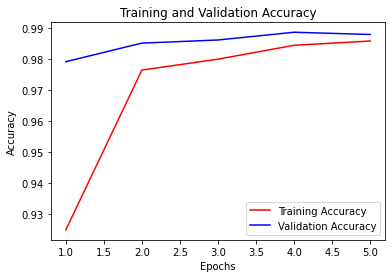

<Figure size 432x288 with 0 Axes>

In [40]:
loss_plt_cnn1=train.history["loss"]
accuracy_plt_cnn1=train.history["accuracy"]
val_loss_plt_cnn1=train.history["val_loss"]
val_accuracy_plt_cnn1=train.history["val_accuracy"]
epochs=range(1,len(accuracy_plt_cnn1)+1)
plt.plot(epochs,accuracy_plt_cnn1,"r",label="Training Accuracy")
plt.plot(epochs,val_accuracy_plt_cnn1,"b",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

#### Saving and Loading the Model

In [45]:
model_save_cnn1=keras.models.load_model("C:/Users/arink/Datamites Capstone Projects/mnist_handwritten_digits_recognition/model1.h5")

#### Evaluation of the Model 1

In [47]:
score_cnn1 = model_save_cnn1.evaluate(X_test, y_test)
print('Test loss:', score_cnn1[0]) #loss
print('Test accuracy:', score_cnn1[1]) #accuracy

313/313 [==============================] - 5s 16ms/step - loss: 0.0314 - accuracy: 0.9898
Test loss: 0.03139176964759827
Test accuracy: 0.989799976348877


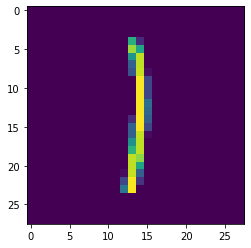

In [48]:
plt.imshow(X_test[40])

In [49]:
predictions_cnn1=model_save_cnn1.predict(X_test)

In [50]:
print(np.argmax(predictions_cnn1[40]))

1


### Model 2 (6 hidden Layers with 2 Dropouts)

-  Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. First Conv2D has 64 filters of kernel size (3X3), then the pooling (MaxPool2D) layer is used at the 2 neighboring pixels and picks the maximal value. The second conv2D layers has 64 filters of kernel size (3X3) and again a the pooling (MaxPool2D) layer is used at the 2 neighboring pixels and picks the maximal value. The Third  conv2D layers has 128 filters of kernel size (3X3) and again a the pooling (MaxPool2D) layer is used at the 2 neighboring pixels and picks the maximal value. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image. 
- 'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.
- The CNN can isolate features that are useful everywhere from these transformed images (feature maps).
- Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. Here we used dropout after combining Conv2D layer and MaxPooling with 25% and after 1 Fully Connected Layer with 50%
- The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.
- In the end the features was connected in two fully-connected (Dense) layers which is just artificial neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.
- Compiling with categorical crossentropy(Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to quantify the difference between two probability distributions) as loss and Adam (Adam optimizer involves a combination of two gradient descent methodologies: Momentum: This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace) as optimizer and checking the accuracy Metrics.
- Callbacks- A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). You can use callbacks to: Write TensorBoard logs after every batch of training to monitor your metrics. Periodically save your model to disk. Here we are checking for EarlyStopping and Model Checkpoint.
- Then Train The Model with batch size =120, and epochs= 20
- plotting a Graph of Train and Test Accuracy of Model w.r.t epochs
- Saving the model in h5(data file saved in the Hierarchical Data Format (HDF)) format for future loading
- Evaluating the Model by checking the Test Loss and Test Accuracy and predicting using np.argmax(is a built-in Numpy function that is used to get the indices of the maximum element from an array (single-dimensional array) or any row or column (multidimensional array) of any given array).

In [51]:
model_cnn2=Sequential()

#### Layers

In [52]:
 ## activation vector- to make it non linear, <0-remove, >0-allow for secong layer.
    
# 1st convolution layer (28-3+1)=26 (26*26)

model_cnn2.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape)) #(28-3+1)=26 (26*26)
model_cnn2.add(MaxPooling2D(pool_size=(2, 2))) # single maximum value 2X2, it will allow this others removed , 26/2=13

# 2nd convolution layer 

model_cnn2.add(Conv2D(64,(3,3),activation='relu')) #13-3+1=11 (11*11)
model_cnn2.add(MaxPooling2D(pool_size=(2, 2))) #11/2= 5.5 =5

# 3rd convolution layer 

model_cnn2.add(Conv2D(128,(3,3),activation='relu')) # 5-3+1=2 (3*3)
model_cnn2.add(MaxPooling2D(pool_size=(2, 2))) # 3/2= 1.5 =1

model_cnn2.add(Dropout(0.25))

## before Fully connected layer we need to flatten layer

model_cnn2.add(Flatten()) # converting 2D to 1D

## to prevent overfitting

model_cnn2.add(Dropout(0.5))

# now fully connect


## we know we have inputs ranging between 0-9 total=10
    

#2nd fully connect layer
model_cnn2.add(Dense(64,activation="relu"))

 #3rd fully connect layer
model_cnn2.add(Dense(10,activation="softmax")) ## activation function changed to softmax(Class Probabilities)
## binary classification- one neuron in Dense Layer activation function but multiple class therefore softmax

In [53]:
model_cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 128)       

#### Compile

In [70]:

model_cnn2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#### Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [71]:
## EarlyStopping

early_stopping_cnn2=EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=4, verbose=1)

## Modelcheckpoints

model_checkpoint_cnn2=ModelCheckpoint("./model2.h5",monitor='val_accuracy',verbose=1,save_best_only=True )

cb_cnn2=[early_stopping_cnn2,model_checkpoint_cnn2]

#### Train the Model 2

In [72]:
batch_size = 120
epochs = 20

train_cnn2 = model_cnn2.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                  validation_data=(X_test, y_test),validation_split=0.3,callbacks=cb_cnn2)

print("The model has successfully trained")

Epoch 1/20
350/350 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9785
Epoch 1: val_accuracy improved from -inf to 0.98644, saving model to .\model2.h5
350/350 [==============================] - 40s 114ms/step - loss: 0.0741 - accuracy: 0.9785 - val_loss: 0.0488 - val_accuracy: 0.9864
Epoch 2/20
350/350 [==============================] - ETA: 0s - loss: 0.0702 - accuracy: 0.9796
Epoch 2: val_accuracy improved from 0.98644 to 0.98672, saving model to .\model2.h5
350/350 [==============================] - 39s 111ms/step - loss: 0.0702 - accuracy: 0.9796 - val_loss: 0.0463 - val_accuracy: 0.9867
Epoch 3/20
350/350 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9803
Epoch 3: val_accuracy did not improve from 0.98672
350/350 [==============================] - 39s 112ms/step - loss: 0.0650 - accuracy: 0.9803 - val_loss: 0.0581 - val_accuracy: 0.9835
Epoch 4/20
350/350 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.982

#### Train Test Accuracy Graph

<Figure size 432x288 with 0 Axes>

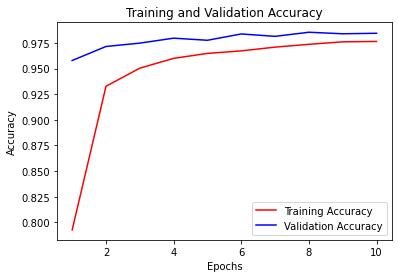

<Figure size 432x288 with 0 Axes>

In [57]:
loss_plt_cnn2=train_cnn2.history["loss"]
accuracy_plt_cnn2=train_cnn2.history["accuracy"]
val_loss_plt_cnn2=train_cnn2.history["val_loss"]
val_accuracy_plt_cnn2=train_cnn2.history["val_accuracy"]
epochs=range(1,len(accuracy_plt_cnn2)+1)
plt.plot(epochs,accuracy_plt_cnn2,"r",label="Training Accuracy")
plt.plot(epochs,val_accuracy_plt_cnn2,"b",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

#### Saving and Loading the Model 2

In [59]:
model_save_cnn2=keras.models.load_model("C:/Users/arink/Datamites Capstone Projects/mnist_handwritten_digits_recognition/model2.h5")

#### Evaluating the Model 2

In [60]:
score_cnn2 = model_save_cnn2.evaluate(X_test, y_test)
print('Test loss:', score_cnn2[0]) #loss
print('Test accuracy:', score_cnn2[1]) #accuracy

313/313 [==============================] - 3s 10ms/step - loss: 0.0531 - accuracy: 0.9842
Test loss: 0.05305422842502594
Test accuracy: 0.9842000007629395


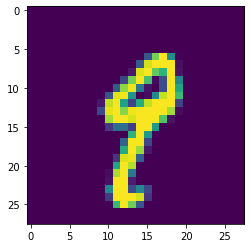

In [61]:
plt.imshow(X_test[78])

In [62]:
prediction_cnn2=model_save_cnn2.predict(X_test)

In [63]:
print(np.argmax(prediction_cnn2[78]))

9



### Model 3  (3 Hidden Layers and Without Dropouts)

- The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. First Conv2D has 32 filters of kernel size (3X3), the second conv2D layers has 64 filters of kernel size (3X3). Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.
- 'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.
- The CNN can isolate features that are useful everywhere from these transformed images (feature maps).
- The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.
- Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.
- Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. Here we used dropout after combining Conv2D layer and MaxPooling and after 1 Fully Connected Layer.
- The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.
- In the end the features was connected in two fully-connected (Dense) layers which is just artificial neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.
- Compiling with categorical crossentropy(Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to quantify the difference between two probability distributions) as loss and Adam (Adam optimizer involves a combination of two gradient descent methodologies: Momentum: This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace) as optimizer and checking the accuracy Metrics.
- Callbacks- A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). You can use callbacks to: Write TensorBoard logs after every batch of training to monitor your metrics. Periodically save your model to disk. Here we are checking for EarlyStopping and Model Checkpoint.
- Then Train The Model with batch size =120, and epochs= 15
- plotting a Graph of Train and Test Accuracy of Model w.r.t epochs
- Saving the model in h5(data file saved in the Hierarchical Data Format (HDF)) format for future loading
- Evaluating the Model by checking the Test Loss and Test Accuracy and predicting using np.argmax(is a built-in Numpy function that is used to get the indices of the maximum element from an array (single-dimensional array) or any row or column (multidimensional array) of any given array).

In [73]:
model_cnn3=Sequential()

#### Layers

In [74]:
model_cnn3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape)) # 32 filters with kernel size 3*3
model_cnn3.add(Conv2D(64,(3,3),activation='relu'))

model_cnn3.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn3.add(Flatten())

model_cnn3.add(Dense(128,activation="relu"))

model_cnn3.add(Dense(10,activation="softmax"))

In [75]:
model_cnn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

#### Compile

In [76]:
model_cnn3.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#### Callbacks

In [77]:
## EarlyStopping

early_stopping_cnn3=EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=4, verbose=1)

## Modelcheckpoints

model_checkpoint_cnn3=ModelCheckpoint("./model3.h5",monitor='val_accuracy',verbose=1,save_best_only=True )

cb_cnn3=[early_stopping_cnn3,model_checkpoint_cnn3]

#### Train Model 3

In [78]:
batch_size = 120
epochs = 15

train_cnn3 = model_cnn3.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                  validation_data=(X_test, y_test),validation_split=0.3,callbacks=cb_cnn3)

print("The model has successfully trained")

Epoch 1/15
350/350 [==============================] - ETA: 0s - loss: 0.1965 - accuracy: 0.9389
Epoch 1: val_accuracy improved from -inf to 0.97533, saving model to .\model3.h5
350/350 [==============================] - 56s 161ms/step - loss: 0.1965 - accuracy: 0.9389 - val_loss: 0.0844 - val_accuracy: 0.9753
Epoch 2/15
350/350 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9839
Epoch 2: val_accuracy improved from 0.97533 to 0.98161, saving model to .\model3.h5
350/350 [==============================] - 57s 162ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0630 - val_accuracy: 0.9816
Epoch 3/15
350/350 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9897
Epoch 3: val_accuracy improved from 0.98161 to 0.98228, saving model to .\model3.h5
350/350 [==============================] - 55s 158ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0617 - val_accuracy: 0.9823
Epoch 4/15
350/350 [==============================] - ETA: 0s

#### Train Test Accuracy Graph

<Figure size 432x288 with 0 Axes>

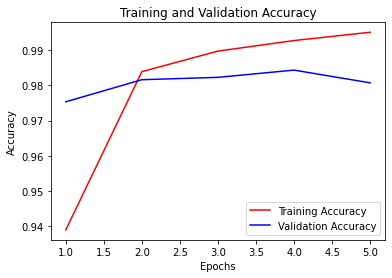

<Figure size 432x288 with 0 Axes>

In [79]:
loss_plt_cnn3=train_cnn3.history["loss"]
accuracy_plt_cnn3=train_cnn3.history["accuracy"]
val_loss_plt_cnn3=train_cnn3.history["val_loss"]
val_accuracy_plt_cnn3=train_cnn3.history["val_accuracy"]
epochs=range(1,len(accuracy_plt_cnn3)+1)
plt.plot(epochs,accuracy_plt_cnn3,"r",label="Training Accuracy")
plt.plot(epochs,val_accuracy_plt_cnn3,"b",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

#### Saving and Loading Model 3

In [81]:
model_save_cnn3=keras.models.load_model("C:/Users/arink/Datamites Capstone Projects/mnist_handwritten_digits_recognition/model3.h5")

#### Evaluate Model 3

In [82]:
score_cnn3 = model_save_cnn3.evaluate(X_test, y_test)
print('Test loss:', score_cnn3[0]) #loss
print('Test accuracy:', score_cnn3[1]) #accuracy

313/313 [==============================] - 3s 10ms/step - loss: 0.0408 - accuracy: 0.9866
Test loss: 0.04077254235744476
Test accuracy: 0.9865999817848206


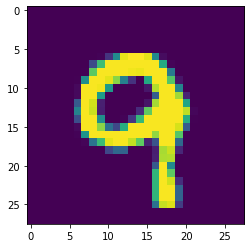

In [83]:
plt.imshow(X_test[99])

In [84]:
prediction_cnn3=model_save_cnn3.predict(X_test)

In [85]:
print(np.argmax(prediction_cnn3[99]))

9


### Model 4 (6 Hidden Layers without Dropouts)

-  Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. First Conv2D has 64 filters of kernel size (3X3), then the pooling (MaxPool2D) layer is used at the 2 neighboring pixels and picks the maximal value. The second conv2D layers has 64 filters of kernel size (3X3) and again a the pooling (MaxPool2D) layer is used at the 2 neighboring pixels and picks the maximal value. The Third  conv2D layers has 128 filters of kernel size (3X3) and again a the pooling (MaxPool2D) layer is used at the 2 neighboring pixels and picks the maximal value. Each filter transforms a part of the image (defined by the kernel size) using the kernalfilter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.
- 'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.
- The CNN can isolate features that are useful everywhere from these transformed images (feature maps).
- No Dropout was taken.
- The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.
- In the end the features was connected in two fully-connected (Dense) layers which is just artificial neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.
- Compiling with categorical crossentropy(Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to quantify the difference between two probability distributions) as loss and Adam (Adam optimizer involves a combination of two gradient descent methodologies: Momentum: This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace) as optimizer and checking the accuracy Metrics.
- Callbacks- A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). You can use callbacks to: Write TensorBoard logs after every batch of training to monitor your metrics. Periodically save your model to disk. Here we are checking for EarlyStopping and Model Checkpoint.
- Then Train The Model with batch size =100, and epochs= 15
- plotting a Graph of Train and Test Accuracy of Model w.r.t epochs
- Saving the model in h5(data file saved in the Hierarchical Data Format (HDF)) format for future loading
- Evaluating the Model by checking the Test Loss and Test Accuracy and predicting using np.argmax(is a built-in Numpy function that is used to get the indices of the maximum element from an array (single-dimensional array) or any row or column (multidimensional array) of any given array).

In [86]:
model_cnn4=Sequential()

#### Layers

In [87]:
 ## activation vector- to make it non linear, <0-remove, >0-allow for secong layer.
    
# 1st convolution layer (28-3+1)=26 (26*26)

model_cnn4.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape)) #(28-3+1)=26 (26*26)
model_cnn4.add(MaxPooling2D(pool_size=(2, 2))) # single maximum value 2X2, it will allow this others removed , 26/2=13

# 2nd convolution layer 

model_cnn4.add(Conv2D(64,(3,3),activation='relu')) #13-3+1=11 (11*11)
model_cnn4.add(MaxPooling2D(pool_size=(2, 2))) #11/2= 5.5 =5

# 3rd convolution layer 

model_cnn4.add(Conv2D(128,(3,3),activation='relu')) # 5-3+1=2 (3*3)
model_cnn4.add(MaxPooling2D(pool_size=(2, 2))) # 3/2= 1.5 =1


## before Fully connected layer we need to flatten layer

model_cnn4.add(Flatten()) # converting 2D to 1D

# now fully connect


## we know we have inputs ranging between 0-9 total=10
    

#2nd fully connect layer
model_cnn4.add(Dense(64,activation="relu"))

 #3rd fully connect layer
model_cnn4.add(Dense(10,activation="softmax")) ## activation function changed to softmax(Class Probabilities)
## binary classification- one neuron in Dense Layer activation function but multiple class therefore softmax

In [88]:
model_cnn4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 128)       

#### Compile

In [89]:
model_cnn4.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#### Callbacks

In [90]:
## EarlyStopping

early_stopping_cnn4=EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=4, verbose=1)

## Modelcheckpoints

model_checkpoint_cnn4=ModelCheckpoint("./model4.h5",monitor='val_accuracy',verbose=1,save_best_only=True )

cb_cnn4=[early_stopping_cnn4,model_checkpoint_cnn4]

#### Train the Model 4

In [91]:
batch_size = 120
epochs = 20

train_cnn4 = model_cnn4.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                  validation_data=(X_test, y_test),validation_split=0.3,callbacks=cb_cnn4)

print("The model has successfully trained")

Epoch 1/20
350/350 [==============================] - ETA: 0s - loss: 0.3738 - accuracy: 0.8892
Epoch 1: val_accuracy improved from -inf to 0.96506, saving model to .\model4.h5
350/350 [==============================] - 37s 104ms/step - loss: 0.3738 - accuracy: 0.8892 - val_loss: 0.1189 - val_accuracy: 0.9651
Epoch 2/20
350/350 [==============================] - ETA: 0s - loss: 0.1038 - accuracy: 0.9685
Epoch 2: val_accuracy improved from 0.96506 to 0.97367, saving model to .\model4.h5
350/350 [==============================] - 36s 103ms/step - loss: 0.1038 - accuracy: 0.9685 - val_loss: 0.0881 - val_accuracy: 0.9737
Epoch 3/20
350/350 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9774
Epoch 3: val_accuracy improved from 0.97367 to 0.97583, saving model to .\model4.h5
350/350 [==============================] - 40s 114ms/step - loss: 0.0749 - accuracy: 0.9774 - val_loss: 0.0763 - val_accuracy: 0.9758
Epoch 4/20
350/350 [==============================] - ETA: 0s

#### Train Test accuracy Graph

<Figure size 432x288 with 0 Axes>

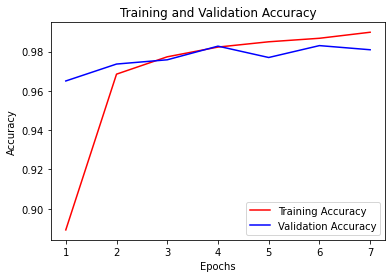

<Figure size 432x288 with 0 Axes>

In [92]:
loss_plt_cnn4=train_cnn4.history["loss"]
accuracy_plt_cnn4=train_cnn4.history["accuracy"]
val_loss_plt_cnn4=train_cnn4.history["val_loss"]
val_accuracy_plt_cnn4=train_cnn4.history["val_accuracy"]
epochs=range(1,len(accuracy_plt_cnn4)+1)
plt.plot(epochs,accuracy_plt_cnn4,"r",label="Training Accuracy")
plt.plot(epochs,val_accuracy_plt_cnn4,"b",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

#### Saving and Loading the Model 4

In [95]:
model_save_cnn4=keras.models.load_model("C:/Users/arink/Datamites Capstone Projects/mnist_handwritten_digits_recognition/model4.h5")

#### Evaluate Model 4

In [96]:
score_cnn4 = model_save_cnn4.evaluate(X_test, y_test)
print('Test loss:', score_cnn4[0]) #loss
print('Test accuracy:', score_cnn4[1]) #accuracy

313/313 [==============================] - 4s 12ms/step - loss: 0.0589 - accuracy: 0.9835
Test loss: 0.05888309329748154
Test accuracy: 0.9835000038146973


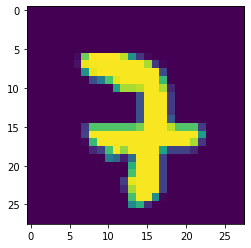

In [97]:
plt.imshow(X_test[301])

In [98]:
prediction_cnn4=model_save_cnn4.predict(X_test)

In [99]:
print(np.argmax(prediction_cnn4[301]))

7


### Model 5 (3 hidden Layers and 1 Dropout)

- The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. First Conv2D has 32 filters of kernel size (3X3), the second conv2D layers has 64 filters of kernel size (3X3). Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.
- 'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.
- The CNN can isolate features that are useful everywhere from these transformed images (feature maps).
- The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.
- Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.
- Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. Here we used dropout after combining Conv2D layer and MaxPooling and after 1 Fully Connected Layer.
- The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.
- In the end the features was connected in two fully-connected (Dense) layers which is just artificial neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.
- Compiling with categorical crossentropy(Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to quantify the difference between two probability distributions) as loss and Adam (Adam optimizer involves a combination of two gradient descent methodologies: Momentum: This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace) as optimizer and checking the accuracy Metrics.
- Callbacks- A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). You can use callbacks to: Write TensorBoard logs after every batch of training to monitor your metrics. Periodically save your model to disk. Here we are checking for EarlyStopping and Model Checkpoint.
- Then Train The Model with batch size =120, and epochs= 15
- plotting a Graph of Train and Test Accuracy of Model w.r.t epochs
- Saving the model in h5(data file saved in the Hierarchical Data Format (HDF)) format for future loading
- Evaluating the Model by checking the Test Loss and Test Accuracy and predicting using np.argmax(is a built-in Numpy function that is used to get the indices of the maximum element from an array (single-dimensional array) or any row or column (multidimensional array) of any given array).

In [100]:
model_cnn5=Sequential()

#### Layers

In [101]:
model_cnn5.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape)) # 32 filters with kernel size 3*3
model_cnn5.add(Conv2D(64,(3,3),activation='relu'))

model_cnn5.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn5.add(Flatten())

model_cnn5.add(Dense(128,activation="relu"))

model_cnn5.add(Dropout(0.25))

model_cnn5.add(Dense(10,activation="softmax"))

In [102]:
model_cnn5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1179776   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

#### Compile

In [103]:
model_cnn5.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#### Callbacks

In [104]:
## EarlyStopping

early_stopping_cnn5=EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=4, verbose=1)

## Modelcheckpoints

model_checkpoint_cnn5=ModelCheckpoint("./model5.h5",monitor='val_accuracy',verbose=1,save_best_only=True )

cb_cnn5=[early_stopping_cnn5,model_checkpoint_cnn5]

#### Train Model 5

In [105]:
batch_size = 120
epochs = 15

train_cnn5 = model_cnn5.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                  validation_data=(X_test, y_test),validation_split=0.3,callbacks=cb_cnn5)

print("The model has successfully trained")

Epoch 1/15
350/350 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.9301
Epoch 1: val_accuracy improved from -inf to 0.97578, saving model to .\model5.h5
350/350 [==============================] - 60s 169ms/step - loss: 0.2256 - accuracy: 0.9301 - val_loss: 0.0802 - val_accuracy: 0.9758
Epoch 2/15
350/350 [==============================] - ETA: 0s - loss: 0.0649 - accuracy: 0.9799
Epoch 2: val_accuracy improved from 0.97578 to 0.98394, saving model to .\model5.h5
350/350 [==============================] - 63s 180ms/step - loss: 0.0649 - accuracy: 0.9799 - val_loss: 0.0502 - val_accuracy: 0.9839
Epoch 3/15
350/350 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9872
Epoch 3: val_accuracy improved from 0.98394 to 0.98728, saving model to .\model5.h5
350/350 [==============================] - 67s 192ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0463 - val_accuracy: 0.9873
Epoch 4/15
350/350 [==============================] - ETA: 0s

#### Train Test Accuracy graph

<Figure size 432x288 with 0 Axes>

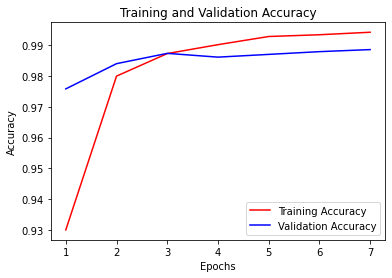

<Figure size 432x288 with 0 Axes>

In [106]:
loss_plt_cnn5=train_cnn5.history["loss"]
accuracy_plt_cnn5=train_cnn5.history["accuracy"]
val_loss_plt_cnn5=train_cnn5.history["val_loss"]
val_accuracy_plt_cnn5=train_cnn5.history["val_accuracy"]
epochs=range(1,len(accuracy_plt_cnn5)+1)
plt.plot(epochs,accuracy_plt_cnn5,"r",label="Training Accuracy")
plt.plot(epochs,val_accuracy_plt_cnn5,"b",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

#### Saving and Loading Model 5

In [107]:
model_save_cnn5=keras.models.load_model("C:/Users/arink/Datamites Capstone Projects/mnist_handwritten_digits_recognition/model5.h5")

#### Evaluate Model 5

In [108]:
score_cnn5 = model_save_cnn5.evaluate(X_test, y_test)
print('Test loss:', score_cnn5[0]) #loss
print('Test accuracy:', score_cnn5[1]) #accuracy

313/313 [==============================] - 4s 11ms/step - loss: 0.0330 - accuracy: 0.9896
Test loss: 0.03301309049129486
Test accuracy: 0.9896000027656555


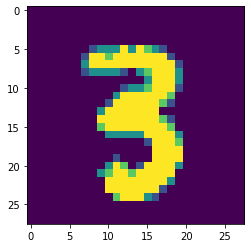

In [109]:
plt.imshow(X_test[68])

In [110]:
prediction_cnn5=model_save_cnn5.predict(X_test)

In [111]:
print(np.argmax(prediction_cnn5[68]))

3


### Model 6 ( 6 Hidden Layers and 1 Dropout)

- Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. First Conv2D has 64 filters of kernel size (3X3), then the pooling (MaxPool2D) layer is used at the 2 neighboring pixels and picks the maximal value. The second conv2D layers has 64 filters of kernel size (3X3) and again a the pooling (MaxPool2D) layer is used at the 2 neighboring pixels and picks the maximal value. The Third conv2D layers has 128 filters of kernel size (3X3) and again a the pooling (MaxPool2D) layer is used at the 2 neighboring pixels and picks the maximal value. Each filter transforms a part of the image (defined by the kernel size) using the kernalfilter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.
- 'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.
- Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. Here we used dropoutafter 1 Fully Connected Layer with 25%.
- The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.
- In the end the features was connected in two fully-connected (Dense) layers which is just artificial neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.
- Compiling with categorical crossentropy(Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to quantify the difference between two probability distributions) as loss and Adam (Adam optimizer involves a combination of two gradient descent methodologies: Momentum: This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace) as optimizer and checking the accuracy Metrics.
- Callbacks- A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). You can use callbacks to: Write TensorBoard logs after every batch of training to monitor your metrics. Periodically save your model to disk. Here we are checking for EarlyStopping and Model Checkpoint.
- Then Train The Model with batch size =100, and epochs= 15
- plotting a Graph of Train and Test Accuracy of Model w.r.t epochs
- Saving the model in h5(data file saved in the Hierarchical Data Format (HDF)) format for future loading
- Evaluating the Model by checking the Test Loss and Test Accuracy and predicting using np.argmax(is a built-in Numpy function that is used to get the indices of the maximum element from an array (single-dimensional array) or any row or column (multidimensional array) of any given array).

In [112]:
model_cnn6=Sequential()

#### Layers

In [113]:
 ## activation vector- to make it non linear, <0-remove, >0-allow for secong layer.
    
# 1st convolution layer (28-3+1)=26 (26*26)

model_cnn6.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape)) #(28-3+1)=26 (26*26)
model_cnn6.add(MaxPooling2D(pool_size=(2, 2))) # single maximum value 2X2, it will allow this others removed , 26/2=13

# 2nd convolution layer 

model_cnn6.add(Conv2D(64,(3,3),activation='relu')) #13-3+1=11 (11*11)
model_cnn6.add(MaxPooling2D(pool_size=(2, 2))) #11/2= 5.5 =5

# 3rd convolution layer 

model_cnn6.add(Conv2D(128,(3,3),activation='relu')) # 5-3+1=2 (3*3)
model_cnn6.add(MaxPooling2D(pool_size=(2, 2))) # 3/2= 1.5 =1

## before Fully connected layer we need to flatten layer

model_cnn6.add(Flatten()) # converting 2D to 1D

# now fully connect


## we know we have inputs ranging between 0-9 total=10
    

#2nd fully connect layer
model_cnn6.add(Dense(64,activation="relu"))

## to prevent overfitting

model_cnn6.add(Dropout(0.25))

 #3rd fully connect layer
model_cnn6.add(Dense(10,activation="softmax")) ## activation function changed to softmax(Class Probabilities)
## binary classification- one neuron in Dense Layer activation function but multiple class therefore softmax

In [114]:
model_cnn6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 1, 128)       

#### Compile

In [115]:
model_cnn6.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#### Callbacks

In [117]:
## EarlyStopping

early_stopping_cnn6=EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=4, verbose=1)

## Modelcheckpoints

model_checkpoint_cnn6=ModelCheckpoint("./model6.h5",monitor='val_accuracy',verbose=1,save_best_only=True )

cb_cnn6=[early_stopping_cnn6,model_checkpoint_cnn6]

#### Train Model 6

In [118]:
batch_size = 120
epochs = 15

train_cnn6 = model_cnn6.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                  validation_data=(X_test, y_test),validation_split=0.3,callbacks=cb_cnn6)

print("The model has successfully trained")

Epoch 1/15
350/350 [==============================] - ETA: 0s - loss: 0.4688 - accuracy: 0.8529
Epoch 1: val_accuracy improved from -inf to 0.96022, saving model to .\model6.h5
350/350 [==============================] - 42s 119ms/step - loss: 0.4688 - accuracy: 0.8529 - val_loss: 0.1336 - val_accuracy: 0.9602
Epoch 2/15
350/350 [==============================] - ETA: 0s - loss: 0.1417 - accuracy: 0.9580
Epoch 2: val_accuracy improved from 0.96022 to 0.97128, saving model to .\model6.h5
350/350 [==============================] - 42s 120ms/step - loss: 0.1417 - accuracy: 0.9580 - val_loss: 0.0929 - val_accuracy: 0.9713
Epoch 3/15
350/350 [==============================] - ETA: 0s - loss: 0.0975 - accuracy: 0.9708
Epoch 3: val_accuracy improved from 0.97128 to 0.97983, saving model to .\model6.h5
350/350 [==============================] - 40s 115ms/step - loss: 0.0975 - accuracy: 0.9708 - val_loss: 0.0685 - val_accuracy: 0.9798
Epoch 4/15
350/350 [==============================] - ETA: 0s

#### Train and Test Accuracy Graph

<Figure size 432x288 with 0 Axes>

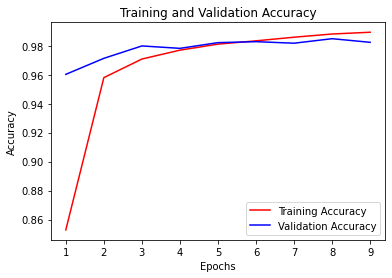

<Figure size 432x288 with 0 Axes>

In [119]:
loss_plt_cnn6=train_cnn6.history["loss"]
accuracy_plt_cnn6=train_cnn6.history["accuracy"]
val_loss_plt_cnn6=train_cnn6.history["val_loss"]
val_accuracy_plt_cnn6=train_cnn6.history["val_accuracy"]
epochs=range(1,len(accuracy_plt_cnn6)+1)
plt.plot(epochs,accuracy_plt_cnn6,"r",label="Training Accuracy")
plt.plot(epochs,val_accuracy_plt_cnn6,"b",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

#### Saving and Loading Model 6

In [120]:
model_save_cnn6=keras.models.load_model("C:/Users/arink/Datamites Capstone Projects/mnist_handwritten_digits_recognition/model6.h5")

#### Evaluate Model 6

In [121]:
score_cnn6 = model_save_cnn6.evaluate(X_test, y_test)
print('Test loss:', score_cnn6[0]) #loss
print('Test accuracy:', score_cnn6[1]) #accuracy

313/313 [==============================] - 4s 11ms/step - loss: 0.0496 - accuracy: 0.9870
Test loss: 0.04962537810206413
Test accuracy: 0.9869999885559082


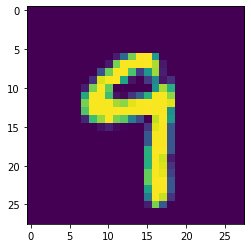

In [122]:
plt.imshow(X_test[108])

In [123]:
prediction_cnn6=model_save_cnn6.predict(X_test)

In [124]:
print(np.argmax(prediction_cnn6[108]))

9


## Data Augmentation

- In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

- For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

- Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

- By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

In [125]:
from keras.layers import *
from keras.utils import *
from keras.models import *
from sklearn.utils import shuffle

import os
import numpy as np
import skimage.io as io
import keras

In [126]:
inputs = Input(shape = (28,28,1))
conv0 = Conv2D(64, 3, padding = 'same', activation = 'relu')(inputs)
conv1 = Conv2D(64, 3, padding='same', activation='relu')(conv0)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(conv1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(128, 3, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 5, padding='same', activation='relu')(conv3)
pool4 = MaxPooling2D((2,2))(conv4)
conv5 = Conv2D(256, 5, padding='same', activation='relu')(pool4)
flat = Flatten()(conv5)
dense0 = Dense(512, activation='relu')(flat)
dense1 = Dense(128, activation='relu')(dense0)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(10, activation='softmax')(dense2)

model_aug = Model(inputs = inputs, outputs = dense3)
print(model_aug.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 128)       147584    
                                                             

In [127]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *

###### For the data augmentation :

- Randomly rotate some training images by 10 degrees
- Randomly Zoom by 10% some training images
- Randomly shift images horizontally by 10% of the width
- Randomly shift images vertically by 10% of the height
- We did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.


In [128]:
train_aug = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False, 
        samplewise_std_normalization = False,
        zca_whitening = False,
        horizontal_flip = False,
        vertical_flip = False,
        fill_mode = 'nearest',
        rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [130]:
import tensorflow

#### Compile

In [131]:
model_aug.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate = 10e-4), loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

- In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

- The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

- Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

- To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

- With the ReduceLROnPlateau function from Keras.callbacks, we choose to reduce the LR.

In [132]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.8,
                              patience=3)

#### Train the Augmentation Model

In [133]:
history = model_aug.fit(train_aug.flow(X_train, y_train, batch_size = 200), epochs = 10,
                               validation_data = (X_test,y_test), callbacks = [reduce_lr])

Epoch 1/10
300/300 [==============================] - 1403s 5s/step - loss: 0.2903 - accuracy: 0.9036 - val_loss: 0.0414 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 2/10
300/300 [==============================] - 1460s 5s/step - loss: 0.0576 - accuracy: 0.9825 - val_loss: 0.0304 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 3/10
300/300 [==============================] - 1346s 4s/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0234 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 4/10
300/300 [==============================] - 1312s 4s/step - loss: 0.0346 - accuracy: 0.9900 - val_loss: 0.0175 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 5/10
300/300 [==============================] - 1322s 4s/step - loss: 0.0300 - accuracy: 0.9913 - val_loss: 0.0214 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 6/10
300/300 [==============================] - 3439s 11s/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0125 - val_accuracy: 0.9964 - lr: 0.0010
Epoch 7/10
300/300 [==============================] - 151


#### Train Test Acuuracy Graph

<Figure size 432x288 with 0 Axes>

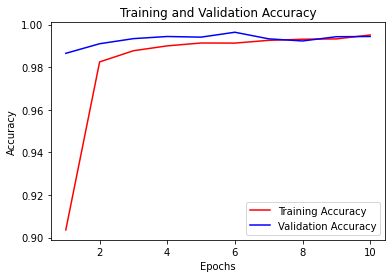

<Figure size 432x288 with 0 Axes>

In [134]:
loss_plt_img=history.history["loss"]
accuracy_plt_img=history.history["accuracy"]
val_loss_plt_img=history.history["val_loss"]
val_accuracy_plt_img=history.history["val_accuracy"]
epochs=range(1,len(accuracy_plt_img)+1)
plt.plot(epochs,accuracy_plt_img,"r",label="Training Accuracy")
plt.plot(epochs,val_accuracy_plt_img,"b",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

#### Evaluate The model

In [137]:
score1 =model_aug.evaluate(X_test, y_test)
print('Test loss:', score1[0]) #loss
print('Test accur`acy:', score1[1]) #accuracy

313/313 [==============================] - 45s 144ms/step - loss: 0.0190 - accuracy: 0.9944
Test loss: 0.019031798467040062
Test accur`acy: 0.9944000244140625


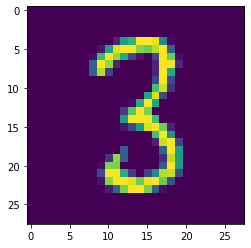

In [138]:
plt.imshow(X_test[335])

In [139]:
output=model_aug.predict(X_test)

In [140]:
print(np.argmax(output[335]))

3


### The improvement after Data Augmentation :

###### Model 1- 
- In model 1 we got an accuracy of 98.97% 

###### Model 2- 
- In model 1 we got an accuracy of 98.42%

###### Model 3- 
- In model 1 we got an accuracy of 98.65%

###### Model 4- 
- In model 1 we got an accuracy of 98.35%

###### Model 5- 
- In model 1 we got an accuracy of 98.96%

###### Model 6- 
- In model 1 we got an accuracy of 98.69%


###### Data Augmentation
- In Data Augmentation Model we got an accuracy of 99.44%

#### Saving the Data Augmentation model in hdf5 format

In [158]:
model_aug.save("finalmodel.h5")

#### Serializing weights with json and HDF5 File

In [156]:
model_json = model_aug.to_json()
with open("modeljson.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_aug.save_weights("modelh5.h5")

In [157]:
# imports

from keras.models import model_from_json 

# opening and store file in a variable

json_file = open('modeljson.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("modelh5.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Loaded Model from disk


In [147]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

In [149]:
import itertools  

#### Confusion Matrix

- Confusion matrix can be very helpfull to see your model drawbacks.

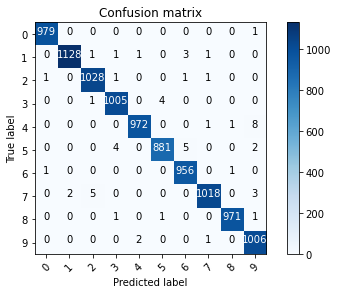

In [150]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_aug.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

- Here we can see that our CNN performs very well on all digits with few errors considering the size of the validation set.

- However, it seems that our CNN has some little troubles with the 3 digits, they are misclassified as 5, even 7 is misclassified with 2 and 9 with 4, 0 with 6 and 7 with 1, 5 with 3,9 and 7. Sometime it is very difficult to catch the difference between 4 and 9 when curves are smooth.

### Let's investigate for errors.

- lets see the most important errors . For that purpose we need to get the difference between the probabilities of real value and the predicted ones in the results.

In [161]:
def draw_output(nums):
    plt.figure(figsize = (20, 20))
    plt.xticks( range(10) )
    x = np.ceil(np.sqrt(len(idx_nums)))
    cnt = 1
    for i in nums:
        plt.subplot(x, x, cnt)
        curr_photo = y_test[i]
        
        plt.xlim(0, 10)
        plt.title("Digit: {0}\n idx: {1} ".format(np.argmax(y_test[i]), i), fontsize = 10) 
        plt.bar(range(10), output[i])
        
        cnt += 1

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


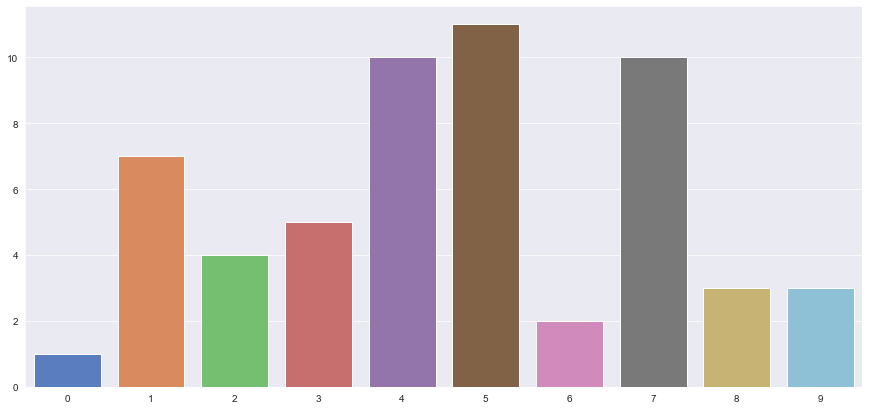

In [162]:
cnt_error = []
for i, (a, b) in enumerate(zip(y_test, output)):
    if np.argmax(a) == np.argmax(b): continue
    cnt_error.append( (np.argmax(a)) )

cnt_error = np.unique(cnt_error, return_counts = True)
sns.set_style("darkgrid")
plt.figure(figsize = (15, 7))
bar_plot = sns.barplot(cnt_error[0], cnt_error[1], palette="muted")
plt.show()

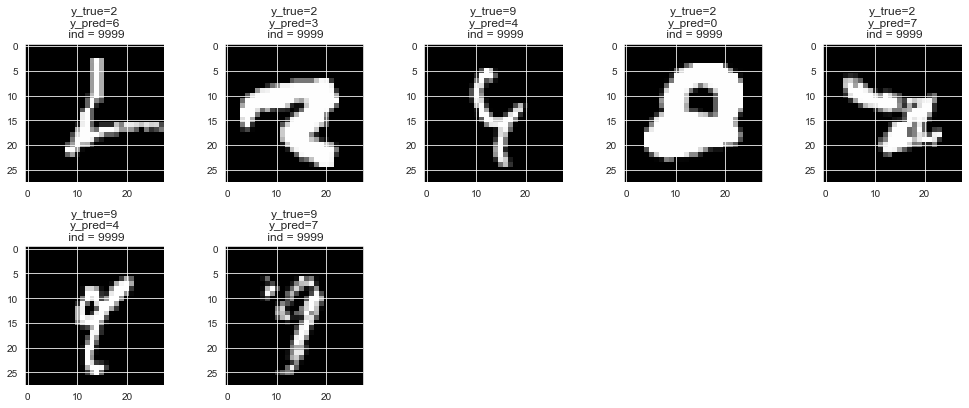

In [163]:
cnt_ind = 1
list_ind = []
X_val_plot = X_test.reshape( X_test.shape[:-1] )
fig = plt.figure(figsize=(14, 14))

for i, (a, b) in enumerate(zip(y_test, output)):
    if np.argmax(a) == np.argmax(b): continue
    if (np.argmax(a) == 2 or np.argmax(a) == 9):    
        plt.subplot(5, 5, cnt_ind)
        plt.imshow(X_val_plot[i], cmap='gray', interpolation='none')
        plt.title('y_true={0}\ny_pred={1}\n ind = {2}'.format(np.argmax(a), np.argmax(b), idx))
        plt.tight_layout()
        list_idx.append(idx)
        cnt_ind += 1